In [2]:
# Set the base directory for the Symbol Recognition System
base_directory = r"C:\Users\user\Desktop\Symbol Recognition System_CID Juba"

# Use this base_directory to access any files or subdirectories within this project

In [3]:
import os

# Set the current working directory to the project folder of CID Finger Print Recognition System Juba
os.chdir(r"C:\Users\user\Desktop\Symbol Recognition System_CID Juba")

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import pickle
import tensorflow as tf
from tensorflow.keras.models import load_model

from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [8]:
def data_info(direct):
    # Accessing the directory specified by 'direct' and listing the names of all files
    # This directory contains fingerprint images for the CID Juba project
    files = [file.strip() for file in os.listdir('./data/' + direct)]

    filenames = []  # Initialize a list to store the filename and its corresponding class label

    # Iterating through each file in the directory
    for file in files:
        # Extracting the filename without the file extension (assuming a 4-character extension)
        # The first character of the filename is used as the class label in the CID Juba dataset
        add = [file[:-4], file[0]]  # Pairing the filename with its class label

        filenames.append(add)  # Adding the pair to the list

    return filenames  # Returning the list containing pairs of filenames and class labels

In [9]:
import pandas as pd

# Extracting file names and labels from the training and testing datasets
# The 'data_info' function retrieves this information from the respective directories
df_train = data_info(direct='train')  # For the training data of CID Juba fingerprints
df_test = data_info(direct='test')    # For the testing data

# Creating DataFrames for the training and testing data
# Each DataFrame consists of 'filename' and 'label' columns
# In the CID Juba project, 'filename' refers to the name of the fingerprint image file,
# and 'label' represents the class/category of the fingerprint
train = pd.DataFrame(df_train, columns=['filename', 'label'])
test = pd.DataFrame(df_test, columns=['filename', 'label'])  # Labels in test data may not be actual labels

# Displaying the first few entries of both training and testing DataFrames
# This is done to visually inspect and confirm the structure of the data
display(train.head(), test.head())

,filename,label
0,1 (1),1
1,1 (10),1
2,1 (2),1
3,1 (3),1
4,1 (4),1


,filename,label
0,1,1
1,10,1
2,11,1
3,12,1
4,13,1


In [10]:
# Printing the number of entries in the training and testing datasets
# This provides an overview of the dataset sizes for the CID Juba fingerprint recognition system
print('train:', len(train))  # Displays the total number of images in the training dataset
print('test:', len(test))   # Displays the total number of images in the testing dataset

train: 80
test: 80


In [11]:
# Function to extract pixel information from fingerprint images
# This function reads image files, calculates pixel values, and returns a DataFrame containing pixel data

def pixel_info(direct, df):
    pixels = []  # List to store pixel information for each image
    for file in list(df['filename']):  # Iterate through each image filename in the provided DataFrame
        from PIL import Image
        im = Image.open('./data/'+direct+'/'+file+'.bmp')  # Open and load the fingerprint image
        pix = list(im.getdata())  # Calculate pixel values for the image
        pixels.append(pix)  # Append the pixel values to the list

    # Create a DataFrame to store the pixel data with columns representing individual pixels
    df_pix = pd.DataFrame(pixels, columns=list(range(144**2)))
    return df_pix  # Return the DataFrame containing pixel data

In [12]:
# Extracting pixel information for training and test datasets

# Using the 'pixel_info' function to extract pixel information for the training dataset
train_pix = pixel_info('train', train)

# Using the 'pixel_info' function to extract pixel information for the test dataset
test_pix = pixel_info('test', test)

In [13]:
# Displaying the first few rows of pixel data for both training and test datasets

# Display the first few rows of pixel data for the training dataset
display(train_pix.head())

# Display the first few rows of pixel data for the test dataset
display(test_pix.head())

,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,0,1,2,3,4,5,6,7,8,9,...,20726,20727,20728,20729,20730,20731,20732,20733,20734,20735
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


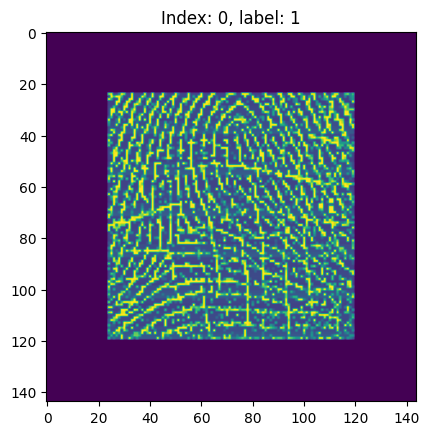

In [14]:
# Visualizing a fingerprint image from its pixel data

# Define the index of the fingerprint image to visualize
idx = 0

# Extract the pixel data for the selected image and reshape it to the original image dimensions
img = train_pix.loc[idx, '0':].values.reshape(144, 144).astype(int)

# Retrieve the corresponding label for this image from the training dataset
label = train.loc[idx, 'label']

# Set the title of the visualization to include the image index and its label
plt.title('Index: %i, label: %s'%(idx, label))

# Display the fingerprint image using imshow
plt.imshow(img)

# Show the image visualization
plt.show()

Train-Test-Split

In [15]:
X_train, X_val, y_train, y_val = train_test_split(train_pix.values, train['label'], test_size = 0.3, random_state=42, shuffle=True, stratify=None)

Random Forest Classifier Model

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
scores = cross_val_score(rf, X_train, y_train, cv = 3, scoring = 'accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


Save Model

In [18]:
with open('./model/model_rf.pkl','wb') as f:
    pickle.dump(rf,f)

Load Model

In [19]:
with open('model/model_rf.pkl', 'rb') as f:
    best = pickle.load(f)

In [20]:
# K = 3 validation score 
val_pred = best.predict(X_val)
acc = (val_pred == y_val).mean()
print("Accuracy: %0.2f" % (acc))

Accuracy: 1.00


In [21]:
print(classification_report(y_val ,val_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [22]:
# Test dataset prediction
test_pred = best.predict(test_pix.values)

In [23]:
test['label'] = test_pred                            
test['filename'] = pd.to_numeric(test["filename"])      # filename numeric
test                                                    

,filename,label
0,1,7
1,10,3
2,11,3
3,12,2
4,13,5
...,...,...
75,78,1
76,79,7
77,8,3
78,80,6


In [24]:
result = test.sort_values(by=['filename'], ascending=True) 
result.head()

,filename,label
0,1,7
11,2,2
22,3,2
33,4,3
44,5,1


In [25]:
result.to_csv('./result/result_rf.csv', index = False)

In [26]:
result = pd.read_csv('./result/result_rf.csv')
result.head()

,filename,label
0,1,7
1,2,2
2,3,2
3,4,3
4,5,1


In [27]:
from collections import Counter
Counter(result['label'])

Counter({7: 5, 2: 25, 3: 20, 1: 3, 5: 10, 6: 9, 8: 5, 4: 3})